A CNN MODEL BUILT FROM SCRATCH


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import (
    ReduceLROnPlateau,
    EarlyStopping,
)

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import AdamW, RMSprop

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train =x_train/255.0
x_test =x_test/255.0

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:

model =  Sequential([
    layers.Conv2D(512, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling(),
    layers.Dropout(0.4),

    layers.Conv2D(256, (3, 3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling(),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling(),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling(),
    layers.Dropout(0.1),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.05),

    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.01),

    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.01),

    layers.Dense(10, activation="softmax")  
])


In [ ]:
model.compile(optimizer = "Adam",loss="categorical_crossentropy",metrics=["accuracy"])



In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.3632 - loss: 1.9821 - val_accuracy: 0.4816 - val_loss: 1.5330
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6046 - loss: 1.1004 - val_accuracy: 0.6866 - val_loss: 0.8798
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6822 - loss: 0.9052 - val_accuracy: 0.7428 - val_loss: 0.7318
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7247 - loss: 0.7795 - val_accuracy: 0.7646 - val_loss: 0.6653
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7566 - loss: 0.6946 - val_accuracy: 0.7562 - val_loss: 0.7135
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7785 - loss: 0.6325 - val_accuracy: 0.7454 - val_loss: 0.7577
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7964 - loss: 0.5798 - val_accuracy: 0.7806 - val_loss: 0.6613
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8122 - loss: 0.5392 - val_accuracy

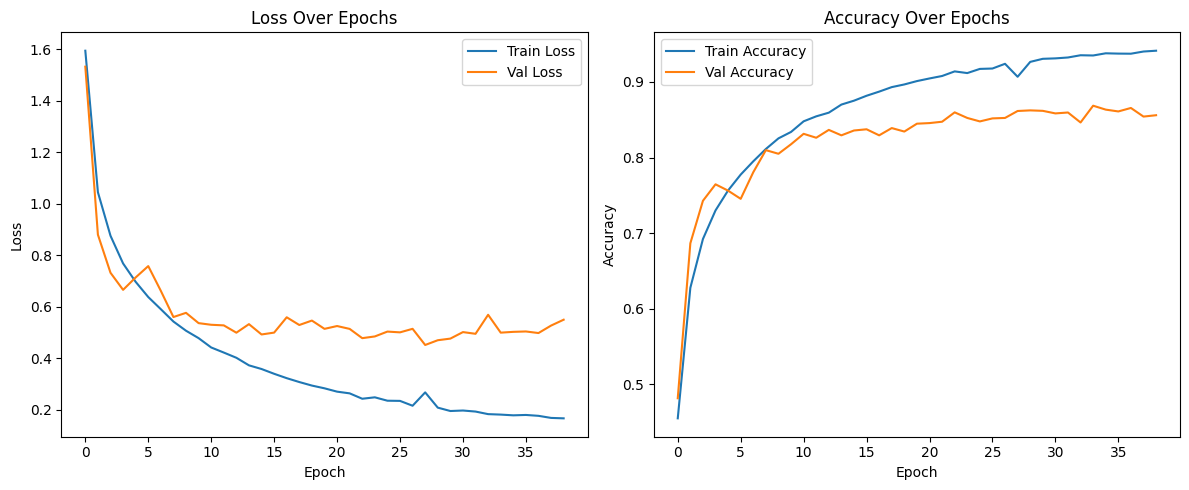

In [ ]:
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)




history = model.fit(x_train,y_train,validation_split=0.2,epochs = 20,batch_size = 256,callbacks =[ lr_scheduler,early_stopping],verbose=1)

plot_training_history(history)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nImproved CNN Test Accuracy: {test_acc * 100:.2f}%")

Using a Pre-Trained ResNet50 model to enhance the accuracy 

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [12]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat, y_test_cat = to_categorical(y_train), to_categorical(y_test)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)

# Load ResNet50 base
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in base_model.layers[:50]:
    layer.trainable = False


In [13]:
model = Sequential([
    Lambda(lambda image: tf.image.resize(image, (224, 224))),
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [14]:
model.compile(optimizer=Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

lr_schedule = ReduceLROnPlateau(monitor='val_accuracy', patience=2, factor=0.5, min_lr=1e-6, verbose=1)

In [15]:
history = model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test_cat),
    callbacks=[lr_schedule, early_stop],
    verbose=1
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 404s 460ms/step - accuracy: 0.4712 - loss: 1.8580 - val_accuracy: 0.6569 - val_loss: 1.4033 - learning_rate: 1.0000e-04
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 340s 435ms/step - accuracy: 0.7688 - loss: 0.9144 - val_accuracy: 0.7394 - val_loss: 1.0537 - learning_rate: 1.0000e-04
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 340s 435ms/step - accuracy: 0.8358 - loss: 0.6970 - val_accuracy: 0.8530 - val_loss: 0.6421 - learning_rate: 1.0000e-04
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 382s 434ms/step - accuracy: 0.8689 - loss: 0.5756 - val_accuracy: 0.7637 - val_loss: 0.9194 - learning_rate: 1.0000e-04
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 340s 434ms/step - accuracy: 0.8860 - loss: 0.4992 - val_accuracy: 0.8780 - val_loss: 0.4960 - learning_rate: 1.0000e-04
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 339s 434ms/step - accuracy: 0.9045 - loss: 0.4223 - val_accuracy: 0.8716 - val_loss: 0.5245 - learning_rate: 1.0000e-04
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nResNet50 Transfer Learning Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.9098 - loss: 0.3436

ResNet50 Transfer Learning Accuracy: 90.78%


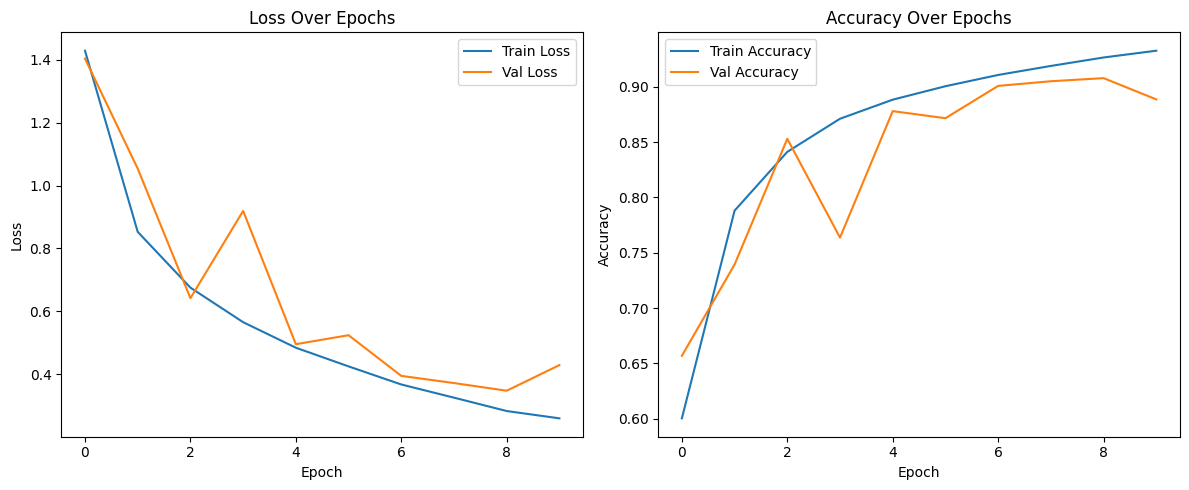

In [18]:
import matplotlib.pyplot as plt
def plot_resnet_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
plot_resnet_history(history)

# **Observations:**

**Accuracy Comparison**

 1. ResNet50 achieved higher test accuracy (90.98%) compared to CNN from scratch (85.22%).

 2. This shows that transfer learning leverages pretrained features effectively, improving performance even with fewer epochs.

**Validation Accuracy**

 1. ResNet50’s val accuracy (88.86%) was slightly lower than its test accuracy, showing good generalization.

 2. CNN model had val accuracy (85.60%), which was closely aligned with its test accuracy — a good sign of stability.

**Training Accuracy**

 1. CNN model had higher training accuracy (94.13%) than ResNet50 (93.47%), but that didn't translate to better test accuracy — indicating possible overfitting.

 2. ResNet50's training accuracy was more balanced with its validation results.

**Loss Comparison**

 1. ResNet50 had a lower validation loss (0.3436) compared to CNN's 0.5492, indicating better model confidence and optimization.

**Training Time**

 1.CNN from scratch trained much faster (~10s per epoch) due to its lighter architecture.

 2. ResNet50 took ~6 minutes per epoch, typical for deep pretrained networks, especially with frozen/unfrozen layers.

**Overfitting**

 1.CNN showed mild overfitting — the training accuracy was high, but the validation accuracy was ~9% lower.

 2.ResNet50 had moderate overfitting — a slightly wider gap between train and validation metrics, likely due to its complexity and power.

**Epoch Efficiency**

 1. CNN required 25 epochs to converge.

 2. ResNet50 achieved high performance in just 10 epochs, showing the efficiency of transfer learning.

**General Insight**

 1. CNN is useful for lightweight models, quicker prototyping, and educational understanding.

 2. ResNet50 is powerful for complex tasks, especially when data is limited, and you want to reuse knowledge from large datasets like ImageNet.